# **Forbes Billionaires Data**

    This Dataset contains list of all the people categorized as Billionaires of 2021 by Forbes in their 35th Annual World's Billionaires List.


Source: https://www.kaggle.com/alexanderbader/forbes-billionaires-of-2021-20

   https://www.kaggle.com/v4rsh1th/bloombergbillionairesdata

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading dataset

In [ ]:
data = pd.read_csv('Billionaire.csv')
data

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


In [ ]:
df = pd.read_csv('forbes_billionaires.csv')
df

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True
...,...,...,...,...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1.0,China,e-commerce,2674,49.0,"Hangzhou, China",China,NaN,NaN,NaN,True
2751,Zhang Yuqiang,1.0,China,Fiberglass,2674,65.0,"Tongxiang, China",China,NaN,NaN,NaN,True
2752,Zhao Meiguang,1.0,China,gold mining,2674,58.0,"Jilin, China",China,NaN,NaN,NaN,True
2753,Zhong Naixiong,1.0,China,conglomerate,2674,58.0,"Foshan, China",China,NaN,NaN,NaN,True


# Basic Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         2755 non-null   object 
 1   NetWorth     2755 non-null   float64
 2   Country      2755 non-null   object 
 3   Source       2755 non-null   object 
 4   Rank         2755 non-null   int64  
 5   Age          2630 non-null   float64
 6   Residence    2715 non-null   object 
 7   Citizenship  2739 non-null   object 
 8   Status       2090 non-null   object 
 9   Children     1552 non-null   float64
 10  Education    1409 non-null   object 
 11  Self_made    2737 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 258.4+ KB


In [ ]:
df.describe()

,NetWorth,Rank,Age,Children
count,2755.000000,2755.000000,2630.00000,1552.000000
mean,4.749220,1345.663521,63.26730,2.978093
std,9.615358,772.669811,13.47916,1.618569
min,1.000000,1.000000,18.00000,1.000000
25%,1.500000,680.000000,54.00000,2.000000
50%,2.300000,1362.000000,63.00000,3.000000
75%,4.200000,2035.000000,73.00000,4.000000
max,177.000000,2674.000000,99.00000,23.000000


# Missing Values

In [ ]:
missing_values = df.isnull().sum().values
missing_values_labels = df.isnull().sum().index
df.isnull().sum()

Name              0
NetWorth          0
Country           0
Source            0
Rank              0
Age             125
Residence        40
Citizenship      16
Status          665
Children       1203
Education      1346
Self_made        18
dtype: int64

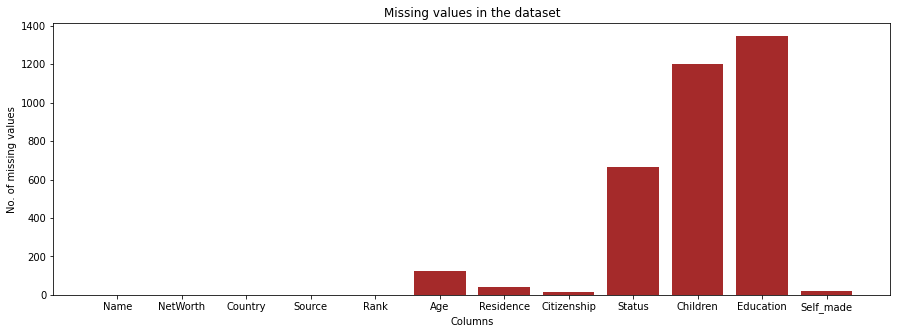

In [ ]:
plt.figure(figsize = (15,5))
plt.bar(missing_values_labels, missing_values, color = 'brown')
plt.title('Missing values in the dataset')
plt.xlabel('Columns')
plt.ylabel('No. of missing values')
# plt.savefig("missing values.png")
# files.download("missing values.png")
plt.show()



    The dataset has quite many missing values in some columns - 

        Education
        Children
        Status
        Age
        Residence
        Self_made
        Citizenship

# Handling Missing Values
Replacing missing values from another dataset.

In [ ]:
df['Industry'] = data[data['Name'] == df['Name']]['Industry']         
df.Industry.isnull().sum()

0

In [ ]:
df['Age'] = data[data['Name'] == df['Name']]['Age']
df.isnull().Age.sum()

79

In [ ]:
df[df.Age.isnull()]

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,Industry
132,Hinduja brothers,14.9,United Kingdom,diversified,133,NaN,"London, United Kingdom",United Kingdom,NaN,NaN,NaN,False,Diversified
255,Lam Wai-ying,9.1,Hong Kong,smartphone screens,256,NaN,"Hong Kong, Hong Kong",Hong Kong,Married,NaN,NaN,True,Manufacturing
268,Chan Tan Ching-fen,8.8,Hong Kong,real estate,269,NaN,"Hong Kong, Hong Kong",Hong Kong,Widowed,2.0,NaN,False,Real Estate
285,Anthony von Mandl,8.7,Canada,alcoholic beverages,274,NaN,"Vancouver, Canada",Canada,NaN,NaN,"Bachelor of Arts/Science, University of Britis...",True,Food & Beverage
294,Kuldip Singh & Gurbachan Singh Dhingra,8.4,India,paints,294,NaN,"Delhi, India",India,Married,NaN,"Bachelor of Arts/Science, Delhi University",True,Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580,Lai Baosheng,1.1,China,consumer technology,2524,NaN,"Shenzhen, China",China,NaN,NaN,NaN,True,Technology
2639,Tseng Sing-ai,1.1,Taiwan,petrochemicals,2524,NaN,Taiwan,Taiwan,NaN,NaN,NaN,False,Manufacturing
2680,Carmen Daurella Aguilera,1.0,Spain,Coca-Cola bottler,2674,NaN,"Barcelona, Spain",Spain,Separated,NaN,NaN,False,Food & Beverage
2714,Michael McCain,1.0,Canada,packaged meats,2674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Food & Beverage


# Country

### Top 10 countries with most billionares

In [ ]:
top_10_countries = df.Country.value_counts().head(10).index
top_10_countries_count = df.Country.value_counts().head(10).values
df.Country.value_counts()


United States    724
China            626
India            140
Germany          136
Russia           118
                ... 
Macao              1
Oman               1
Nepal              1
Liechtenstein      1
Algeria            1
Name: Country, Length: 70, dtype: int64

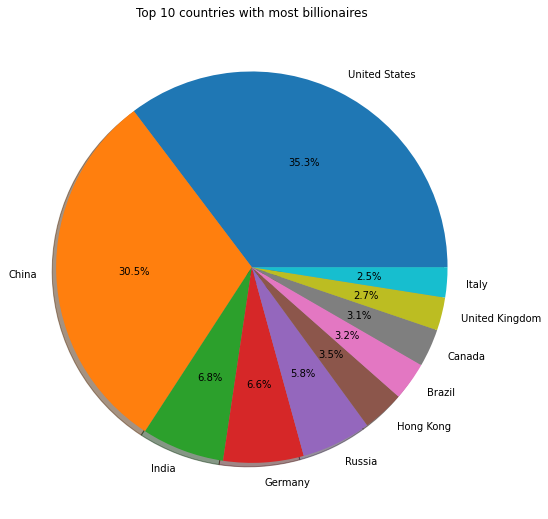

In [ ]:
plt.figure(figsize = (9,9))
total = sum(top_10_countries_count)
plt.pie(top_10_countries_count,labels =  top_10_countries, shadow=True , autopct = '%1.1f%%' )
plt.title('Top 10 countries with most billionaires')
# plt.savefig("Top 10 countries with most billionaires.png")
# files.download("Top 10 countries with most billionaires.png")
plt.show()




      Top 5 countries producing most billionaires :

      1. USA
      2. China
      3. India
      4. Germany
      5. Russia

### Indian Billionaires

In [ ]:
indian_df = df[df['Country'] == 'India']
indian_df

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,Industry
9,Mukesh Ambani,84.5,India,diversified,10,63.0,"Mumbai, India",India,Married,3.0,"Drop Out, Stanford University; Bachelor of Sci...",False,Diversified
23,Gautam Adani & family,50.5,India,"infrastructure, commodities",24,58.0,"Ahmedabad, India",India,Married,2.0,NaN,True,Diversified
71,Shiv Nadar,23.5,India,software services,71,75.0,"Delhi, India",India,Married,1.0,"Bachelor of Arts/Science, PSG College of Techn...",True,Technology
116,Radhakishan Damani,16.5,India,"retail, investments",117,66.0,"Mumbai, India",India,Married,3.0,NaN,True,Fashion & Retail
122,Uday Kotak,15.9,India,banking,121,62.0,"Mumbai, India",India,Married,2.0,"Bachelor of Arts/Science, Bombay University; M...",True,Finance & Investments
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,Ramesh Kumar Dua,1.0,India,footwear,2674,67.0,"Delhi, India",India,Married,3.0,NaN,True,Fashion & Retail
2698,Ashok Kajaria,1.0,India,tiles,2674,73.0,"Delhi, India",India,Married,2.0,"Bachelor of Science in Engineering, UCLA",True,Manufacturing
2699,T.S. Kalyanaraman,1.0,India,jewelry,2674,73.0,"Thrissur, India",India,Married,3.0,NaN,True,Fashion & Retail
2712,Rafique Malik,1.0,India,footwear,2674,70.0,"Mumbai, India",India,Married,5.0,NaN,False,Fashion & Retail




     There are 140 billionaires from India,  with 1 being in top 10.

# Net worth 

### Top 10 Net Worth

In [ ]:
top_10= df.sort_values(by = ['NetWorth'], ascending = False).head(10)
top_10

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True,Technology
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,"Master of Science, Columbia University; Bachel...",True,Finance & Investments
6,Larry Ellison,93.0,United States,software,7,76.0,"Lanai, Hawaii",United States,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni...",True,Technology
7,Larry Page,91.5,United States,Google,8,48.0,"Palo Alto, California",United States,Married,1.0,"Master of Science, Stanford University; Bachel...",True,Technology
8,Sergey Brin,89.0,United States,Google,9,47.0,"Los Altos, California",United States,Married,3.0,"Master of Science, Stanford University; Bachel...",True,Technology
9,Mukesh Ambani,84.5,India,diversified,10,63.0,"Mumbai, India",India,Married,3.0,"Drop Out, Stanford University; Bachelor of Sci...",False,Diversified


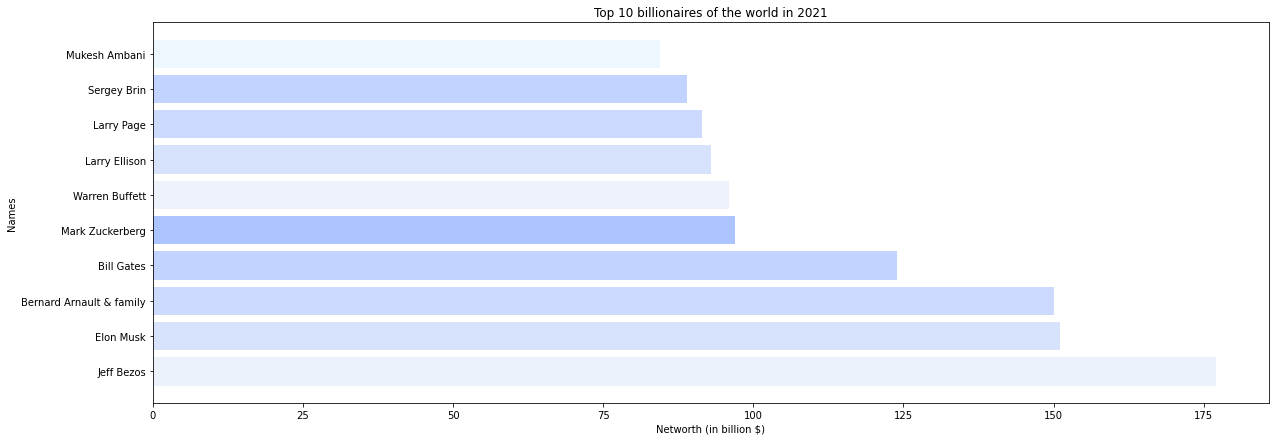

In [ ]:
plt.figure(figsize = (20,7))
plt.barh(top_10['Name'],top_10['NetWorth'], color = ('#ecf2fb', '#d7e3fc','#ccdbfd','#c1d3fe' ,'#abc4ff','#edf2fb', '#d7e3fc','#ccdbfd','#c1d3fe' ,'#edf7fe'))
plt.title('Top 10 billionaires of the world in 2021')
plt.ylabel('Names') 
plt.xlabel('Networth (in billion $)')
# plt.savefig("Top 10 billionaires of the world in 2021.png")
# files.download("Top 10 billionaires of the world in 2021.png")
plt.show()

### Top 10 Indians Net Worth

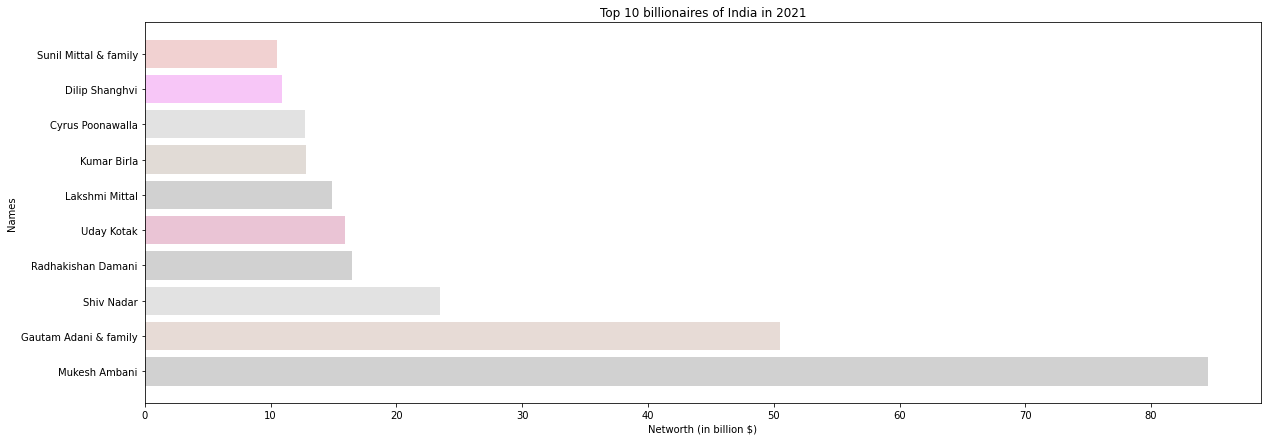

In [ ]:
plt.figure(figsize = (20,7))
plt.barh(indian_df['Name'].head(10),indian_df['NetWorth'].head(10), color = ('#d1d1d1' , '#e7dbd6', '#e2e2e2' ,'#d1d1d1', '#eac4d5','#d1d1d1' , '#e1dbd6', '#e2e2e2' ,'#f7c6f7', '#f1d1d1'))
plt.title('Top 10 billionaires of India in 2021')
plt.ylabel('Names') 
plt.xlabel('Networth (in billion $)')

# plt.savefig("Top 10 billionaires of India in 2021.png")
# files.download("Top 10 billionaires of India in 2021.png")
plt.show()

# Top Industries

In [ ]:
industries = df['Industry'].value_counts().index
industries_count = df['Industry'].value_counts().values

df['Industry'].value_counts()

Finance & Investments         371
Technology                    365
Manufacturing                 331
Fashion & Retail              273
Healthcare                    221
Food & Beverage               219
Real Estate                   215
Diversified                   188
Energy                        100
Media & Entertainment          95
Service                        75
Metals & Mining                74
Automotive                     68
Construction & Engineering     44
Logistics                      35
Telecom                        32
Gambling & Casinos             25
Sports                         24
Name: Industry, dtype: int64

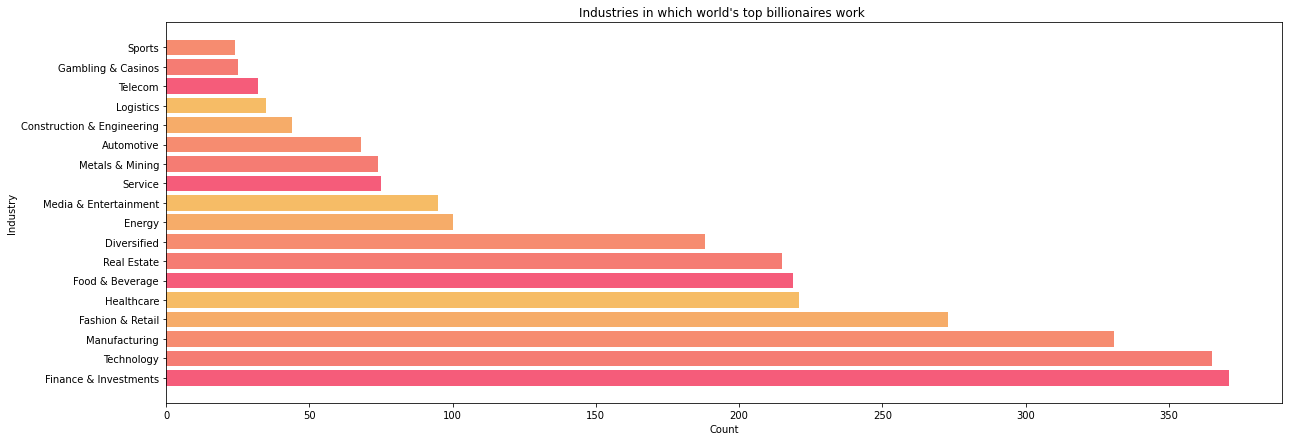

In [ ]:
plt.figure(figsize = (20,7))
plt.barh(industries,industries_count, color = ('#f55c7a', '#f57c73' , '#f68c70' , '#f6ac69' , '#f6bc66','#f55c7a', '#f57c73' , '#f68c70' , '#f6ac69' , '#f6bc66','#f55c7a', '#f57c73' , '#f68c70' , '#f6ac69' , '#f6bc66'))
plt.title("Industries in which world's top billionaires work ")
plt.xlabel('Count') 
plt.ylabel('Industry')

# plt.savefig("Industries in which world's top billionaires work.png")
# files.download("Industries in which world's top billionaires work.png")
plt.show()



    From here we can see that majority of the billionares work in these top 5 industries:

        1. Finance & Investment
        2.  Technology
        3.  Manufacturing
        4.  Fashion & Retail
        5.  Healthcare





### Top 100 billionaires Industries

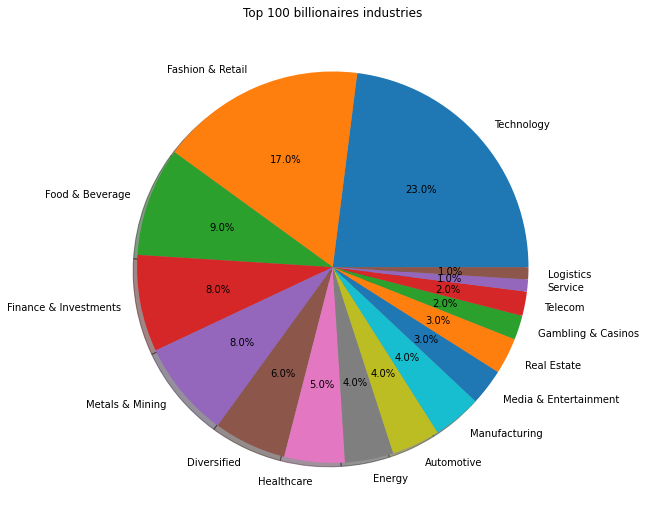

In [ ]:
plt.figure(figsize = (9,9))
plt.pie(df['Industry'].head(100).value_counts().values,
        labels = df['Industry'].head(100).value_counts().index, 
        shadow=True , 
        autopct = '%1.1f%%' )
plt.title('Top 100 billionaires industries')

# plt.savefig("Top 100 billionaires industries.png")
# files.download("Top 100 billionaires industries.png")
plt.show()


    These are the top 5 industries pursued by top 100 billionaires:

        1.  Technology
        2.  Fashion & Retail
        3.  Food & Beverage
        4.  Metals & Mining
        5.  Finance & Investment


### Top 10 Billionaires Industries

In [ ]:
top_10[['Rank','Name', 'Industry']]

,Rank,Name,Industry
0,1,Jeff Bezos,Technology
1,2,Elon Musk,Automotive
2,3,Bernard Arnault & family,Fashion & Retail
3,4,Bill Gates,Technology
4,5,Mark Zuckerberg,Technology
5,6,Warren Buffett,Finance & Investments
6,7,Larry Ellison,Technology
7,8,Larry Page,Technology
8,9,Sergey Brin,Technology
9,10,Mukesh Ambani,Diversified


In [ ]:
top_10['Industry'].value_counts()

Technology               6
Fashion & Retail         1
Diversified              1
Automotive               1
Finance & Investments    1
Name: Industry, dtype: int64

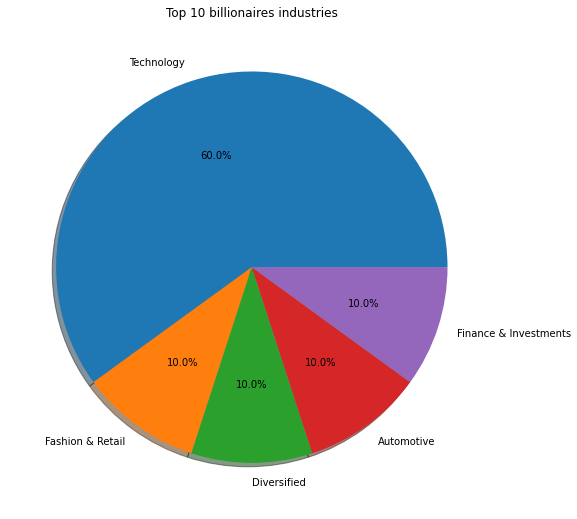

In [ ]:
plt.figure(figsize = (9,9))
plt.pie(top_10['Industry'].value_counts().values,
        labels = top_10['Industry'].value_counts().index, 
        shadow=True , 
        autopct = '%1.1f%%' )
plt.title('Top 10 billionaires industries')

# plt.savefig("Top 10 billionaires industries.png")
# files.download("Top 10 billionaires industries.png")
plt.show()


     
        But if we look at top 10 richest people, Technology seems to be the most promising industry.


### Top Indian billionaies industries

In [ ]:
indian_df.Industry.value_counts()

Manufacturing                 27
Healthcare                    24
Diversified                   17
Fashion & Retail              13
Technology                    12
Food & Beverage               10
Real Estate                    8
Finance & Investments          8
Automotive                     6
Construction & Engineering     5
Service                        4
Metals & Mining                3
Energy                         1
Media & Entertainment          1
Telecom                        1
Name: Industry, dtype: int64

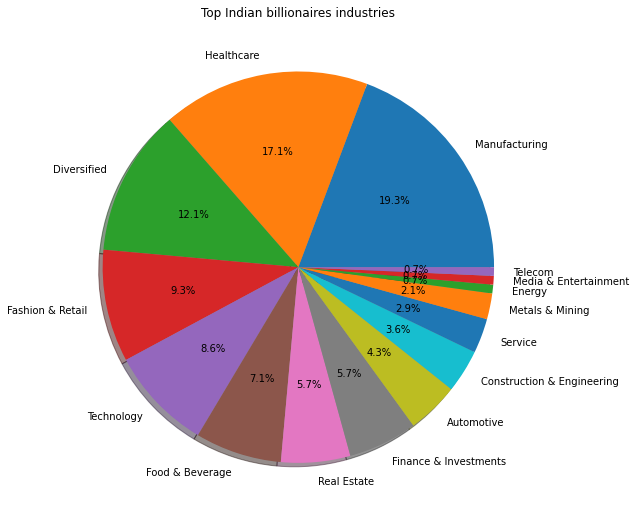

In [ ]:
plt.figure(figsize = (9,9))
plt.pie(indian_df['Industry'].value_counts().values,
        labels = indian_df['Industry'].value_counts().index, 
        shadow=True , 
        autopct = '%1.1f%%' )
plt.title('Top Indian billionaires industries')

# plt.savefig("Top Indian billionaires industries.png")
# files.download("Top Indian billionaires industries.png")
plt.show()


    These are the top 5 industries pursued by Indian billionaires:

        1.  Manufacturing
        2.  Healthcare
        3.  Diversified
        4.  Fashion & Retail
        5.  Technology


# Age

### Top 10 billionaires Age

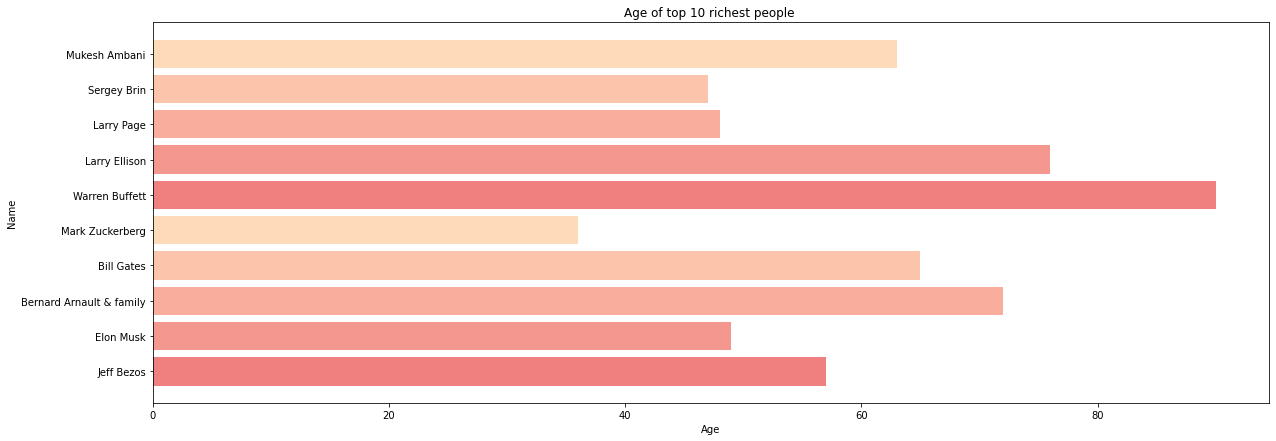

In [ ]:
plt.figure(figsize = (20,7))
plt.barh(top_10['Name'],top_10['Age'], color = ('#f08080' , '#f4978e' , '#f8ad9d', '#fbc4ab' , '#ffdab9','#f08080' , '#f4978e' , '#f8ad9d', '#fbc4ab' , '#ffdab9'))
plt.title("Age of top 10 richest people ")
plt.xlabel('Age') 
plt.ylabel('Name')

# plt.savefig("Age of top 10 richest people .png")
# files.download("Age of top 10 richest people .png")
plt.show()



     Mark Zukerberg is the youngest in the top 10.

     Warren Buffett is the oldest in the top 10.

In [ ]:
top_10['Age'].mean()

60.3

In [ ]:
top_10['Age'].median()

60.0

### Age distribution

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

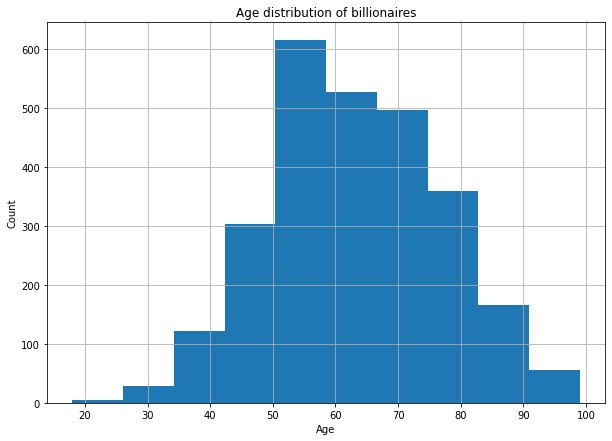

In [ ]:
plt.figure(figsize = (10,7))
df.Age.hist()
plt.title("Age distribution of billionaires")
plt.xlabel('Age') 
plt.ylabel('Count')

# plt.savefig("Age distribution of billionaires.png")
# files.download("Age distribution of billionaires.png")
plt.show()



      It is clearly visible that majority of the billionares lie in the age range of 50 - 60.

      

In [ ]:
df['Age'].mean()

63.1136023916293

In [ ]:
df['Age'].median()

63.0

In [ ]:
print(df[(df.Age > 50) & (df.Age < 60)]['Name'].count())

699


In [ ]:
print(df[df.Age < 40]['Name'].count())

106


In [ ]:
print(df[df.Age < 30]['Name'].count())

10


In [ ]:
print(df[df.Age < 20]['Name'].count())

1


In [ ]:
print(df[df.Age > 90]['Name'].count())

55


### Indian Billionaires Age distribution

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

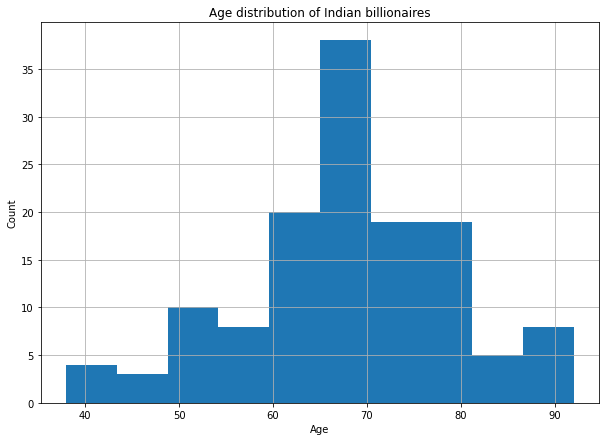

In [ ]:
plt.figure(figsize = (10,7))
indian_df.Age.hist()
plt.title("Age distribution of Indian billionaires")
plt.xlabel('Age') 
plt.ylabel('Count')

plt.savefig("Age distribution of Indian billionaires.png")
files.download("Age distribution of Indian billionaires.png")
plt.show()




      In India, majority of the billionares are in the age group 65 - 70.

In [ ]:
indian_df.sort_values(by = ['Age']).head()

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,Industry
2528,Binny Bansal,1.1,India,flipkart,2524,38.0,"Singapore, Singapore",India,Married,2.0,"Bachelor of Science in Engineering, Indian Ins...",True,Technology
1255,Byju Raveendran and Divya Gokulnath,2.5,India,education technology,1249,39.0,"Bangalore, India",India,Married,2.0,NaN,True,Technology
2382,Sachin Bansal,1.2,India,flipkart,2378,39.0,"Bangalore, India",India,Married,1.0,"Bachelor of Science in Engineering, Indian Ins...",True,Fashion & Retail
1424,Vijay Shekhar Sharma,2.3,India,financial technology,1362,42.0,"Delhi, India",India,Married,1.0,"Bachelor of Science in Engineering, Delhi Univ...",True,Service
1447,Acharya Balkrishna,2.2,India,consumer goods,1444,48.0,"Haridwar, India",India,Single,NaN,NaN,True,Food & Beverage


In [ ]:
indian_df.sort_values(by = ['Age'], ascending = False).head()

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,Industry
1872,Devendra Jain,1.7,India,chemicals,1833,92.0,"Delhi, India",India,Married,4.0,"Bachelor of Arts/Science, Delhi University",False,Manufacturing
1716,Lachhman Das Mittal,1.9,India,tractors,1664,90.0,"Delhi, India",India,Married,5.0,"Bachelor of Arts/Science, Punjab University; M...",False,Automotive
273,Benu Gopal Bangur,8.7,India,cement,274,89.0,"Kolkata, India",India,Widowed,2.0,"Bachelor of Arts/Science, Calcutta University",False,Manufacturing
2100,Prathap Reddy,1.5,India,healthcare,2035,89.0,"Chennai, India",India,Married,4.0,NaN,True,Healthcare
302,Kushal Pal Singh,8.3,India,real estate,297,89.0,"Delhi, India",India,Widowed,3.0,"Bachelor of Arts/Science, Delhi University",False,Real Estate


### Youngest Billionaire

In [ ]:
df.sort_values(by = 'Age').head(1)

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,Industry
940,Kevin David Lehmann,3.3,Germany,drugstores,925,18.0,NaN,Germany,NaN,NaN,NaN,False,Fashion & Retail


### Oldest Billionaire

In [ ]:
df.sort_values(by = 'Age', ascending = False).head(1)

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,Industry
1611,George Joseph,2.0,United States,insurance,1580,99.0,"Los Angeles, California",United States,Married,5.0,"Bachelor of Arts/Science, Harvard University",True,Finance & Investments


# Self Made Billionaires




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

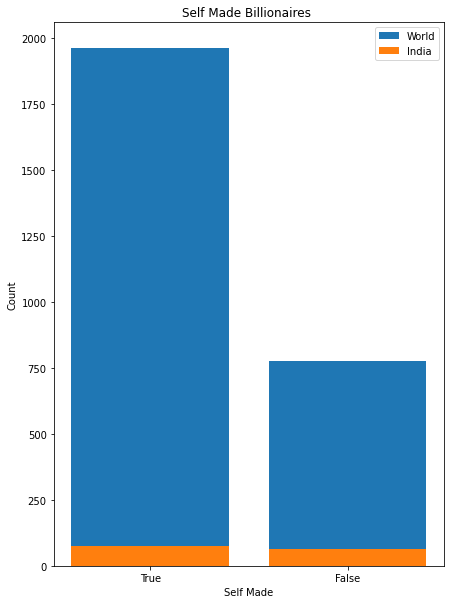

In [ ]:
plt.figure(figsize = (7,10))
group = ['True', 'False']
plt.bar(group, df.Self_made.value_counts().values, label = 'World')
plt.bar(group, indian_df.Self_made.value_counts().values, label = 'India')


plt.title("Self Made Billionaires ")
plt.xlabel('Self Made') 
plt.ylabel('Count')
plt.legend()

plt.savefig("Self Made Billionaires.png")
files.download("Self Made Billionaires.png")
plt.show()


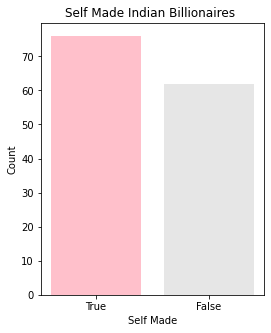

In [ ]:
plt.figure(figsize = (4,5))
group = ['True', 'False']
plt.bar(group, indian_df.Self_made.value_counts().values, color = ('pink','0.9'))


plt.title("Self Made Indian Billionaires ")
plt.xlabel('Self Made') 
plt.ylabel('Count')

# plt.savefig("Self Made Indian Billionaires.png")
# files.download("Self Made Indian Billionaires.png")
plt.show()



     Most of the billionaires are Self Made but in India the difference is not much.

# Status

In [ ]:
df.Status.value_counts()

Married               1734
Divorced               144
Widowed                 95
Single                  74
In Relationship         21
Separated               10
Widowed, Remarried       8
Engaged                  4
Name: Status, dtype: int64

In [ ]:
top_10.Status.value_counts()


Married               5
In Relationship       3
Divorced              1
Widowed, Remarried    1
Name: Status, dtype: int64

# Children

In [ ]:
df['Children'].value_counts()

2.0     533
3.0     440
4.0     227
1.0     161
5.0     104
6.0      39
7.0      24
8.0      10
10.0      6
11.0      2
9.0       2
23.0      1
15.0      1
14.0      1
13.0      1
Name: Children, dtype: int64

In [ ]:
top_10['Children'].value_counts()


3.0    4
4.0    2
1.0    1
2.0    1
5.0    1
7.0    1
Name: Children, dtype: int64

In [ ]:
indian_df['Children'].value_counts()


2.0    71
3.0    34
1.0    10
4.0     4
5.0     2
9.0     1
Name: Children, dtype: int64

# Education

### Making new Fields- Course and Institute

In [ ]:
df.Education.isnull().sum()

1346

In [ ]:
df['Education'].fillna('Unknown,Unknown', inplace = True)
df.Education.isnull().sum()

0

In [ ]:
df['Course'] = df['Education'].apply(lambda x: x.split(',')[0])
df['Institute'] = df['Education'].apply(lambda x: x.split(',')[-1])
df.head()


,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,Industry,Course,Institute
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True,Technology,Bachelor of Arts/Science,Princeton University
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True,Automotive,Bachelor of Arts/Science,University of Pennsylvania
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False,Fashion & Retail,Bachelor of Arts/Science,Ecole Polytechnique de Paris
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True,Technology,Drop Out,Harvard University
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True,Technology,Drop Out,Harvard University


In [ ]:
df.Course.isnull().sum()

0

In [ ]:
df.Institute.isnull().sum()

0

### Course

In [ ]:
df['Course'].value_counts()[:11]

Unknown                               1346
Bachelor of Arts/Science               638
Master of Business Administration      166
Master of Science                       82
Drop Out                                74
Bachelor of Science                     46
Bachelor of Science in Engineering      44
Doctorate                               40
Diploma                                 35
Bachelor of Arts/Economics              29
Bachelor of Engineering                 28
Name: Course, dtype: int64

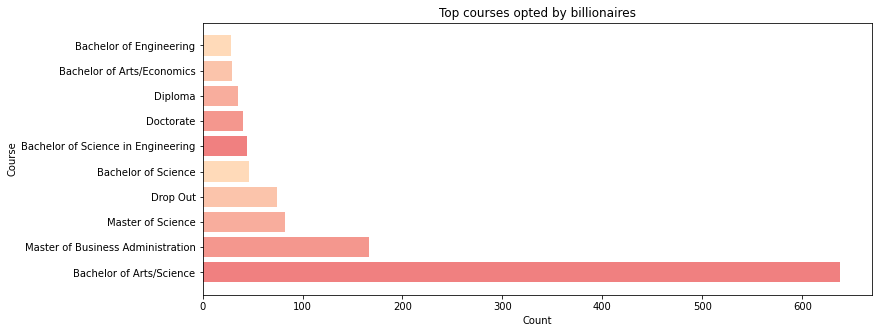

In [ ]:
plt.figure(figsize = (12,5))
# plt.figure(figsize = (20,7))
plt.barh(df['Course'].value_counts()[1:11].index ,
         df['Course'].value_counts()[1:11].values,
         color = ('#f08080' , '#f4978e' , '#f8ad9d', '#fbc4ab' , '#ffdab9','#f08080' , '#f4978e' , '#f8ad9d', '#fbc4ab' , '#ffdab9'))
plt.title("Top courses opted by billionaires")
plt.xlabel('Count') 
plt.ylabel('Course')

# plt.savefig("Top courses opted by billionaires.png")
# files.download("Top courses opted by billionaires.png")
plt.show()

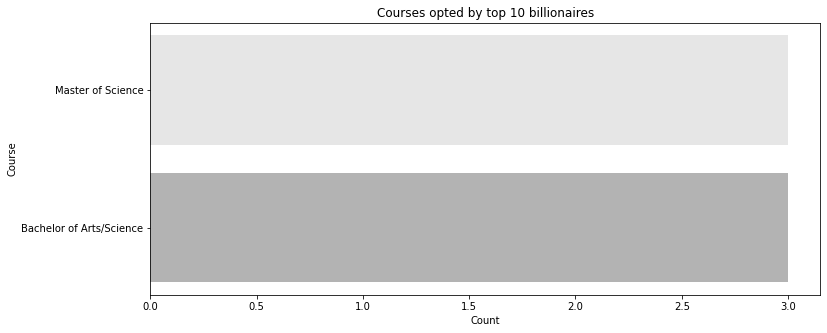

In [ ]:
top_10 = df.head(10)

plt.figure(figsize = (12,5))
plt.barh(top_10['Course'].value_counts()[1:11].index ,
         top_10['Course'].value_counts()[1:11].values,
         color = ('0.7','0.9'))
plt.title("Courses opted by top 10 billionaires")
plt.xlabel('Count') 
plt.ylabel('Course')

# plt.savefig("Courses opted by top 10 billionaires.png")
# files.download("Courses opted by top 10 billionaires.png")
plt.show()
plt.show()

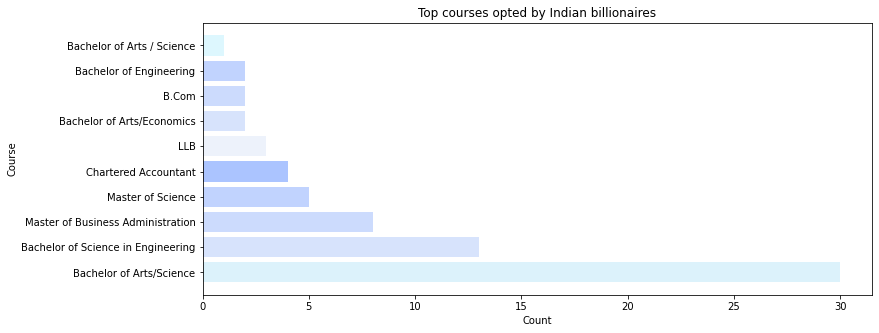

In [ ]:
indian_df = df[df['Country'] == 'India']

plt.figure(figsize = (12,5))
plt.barh(indian_df['Course'].value_counts()[1:11].index ,
         indian_df['Course'].value_counts()[1:11].values,
         color = ('#dcf2fb', '#d7e3fc','#ccdbfd','#c1d3fe' ,'#abc4ff','#edf2fb', '#d7e3fc','#ccdbfd','#c1d3fe' ,'#ddf7fe'))
plt.title("Top courses opted by Indian billionaires")
plt.xlabel('Count') 
plt.ylabel('Course')

# plt.savefig("Top courses opted by Indian billionaires.png")
# files.download("Top courses opted by Indian billionaires.png")
plt.show()


### Institute

In [ ]:
df['Institute'].value_counts()[1:11]

 Harvard University                       44
 Stanford University                      41
 High School                              39
 The Wharton School                       24
 Yale University                          21
 Massachusetts Institute of Technology    18
 Tsinghua University                      17
 University of Southern California        17
 Berkeley                                 15
 New York University                      14
Name: Institute, dtype: int64

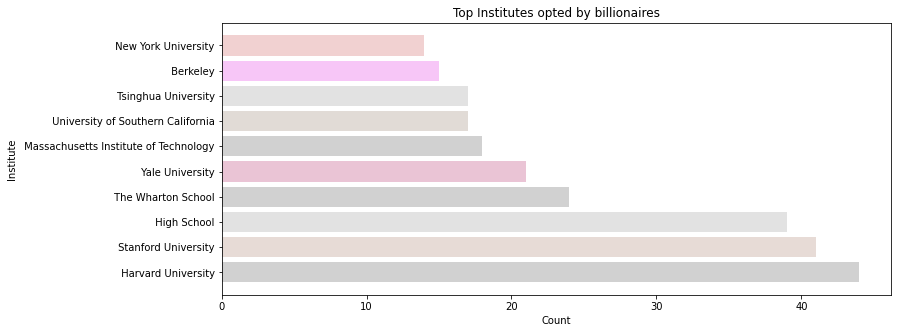

In [ ]:
plt.figure(figsize = (12,5))

plt.barh(df['Institute'].value_counts()[1:11].index ,
         df['Institute'].value_counts()[1:11].values,
         color = ('#d1d1d1' , '#e7dbd6', '#e2e2e2' ,'#d1d1d1', '#eac4d5','#d1d1d1' , '#e1dbd6', '#e2e2e2' ,'#f7c6f7', '#f1d1d1'))
plt.title("Top Institutes opted by billionaires")
plt.xlabel('Count') 
plt.ylabel('Institute')

# plt.savefig("Top Institute opted by billionaires.png")
# files.download("Top Institute opted by billionaires.png")
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

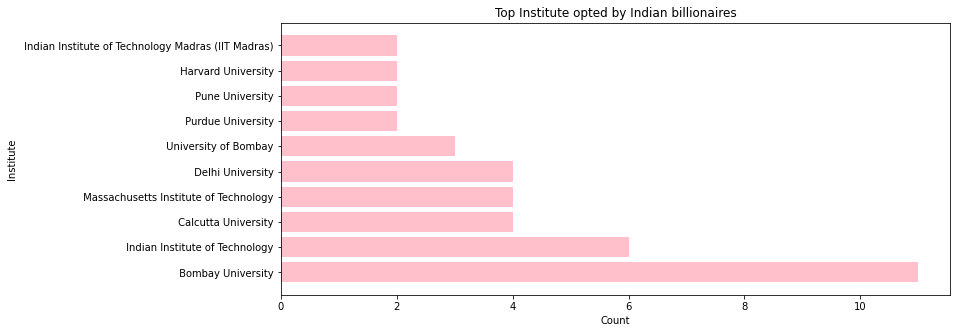

In [ ]:
plt.figure(figsize = (12,5))
plt.barh(indian_df['Institute'].value_counts()[1:11].index ,
         indian_df['Institute'].value_counts()[1:11].values,
         color = 'pink')
plt.title("Top Institute opted by Indian billionaires")
plt.xlabel('Count') 
plt.ylabel('Institute')

# from google.colab import files

# plt.savefig("Top courses opted by Indian billionaires.png")
# files.download("Top courses opted by Indian billionaires.png")
plt.show()







          Created by - 
          
           Tanisha Yadav 

           